In [1]:
import sys
sys.path.append("../../")

In [31]:
from pylib.utils.functions_for_regression import non_lin_data, plot_scatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

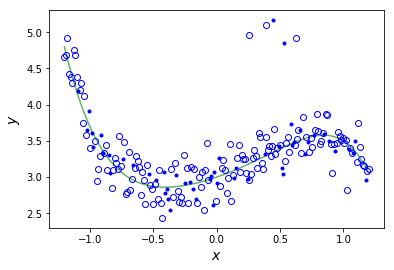

In [3]:
X_train, X_test, y_train, y_test, f = non_lin_data(200)
plot_scatter(X_train, X_test, y_train, y_test, f)

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor

gp = GaussianProcessRegressor()
gp.fit(X_train, y_train)

GaussianProcessRegressor()

In [14]:
y_pred = gp.predict(X_test)

### 均方根误差

In [15]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.3396117785405914

### 可决系数$R^2$

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.5008871713633125

### 平均绝对误差

In [21]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

0.19333476218818973

### 可解释方差

In [25]:
from sklearn.metrics import explained_variance_score

explained_var = explained_variance_score(y_test, y_pred)
explained_var

0.5014417315914665

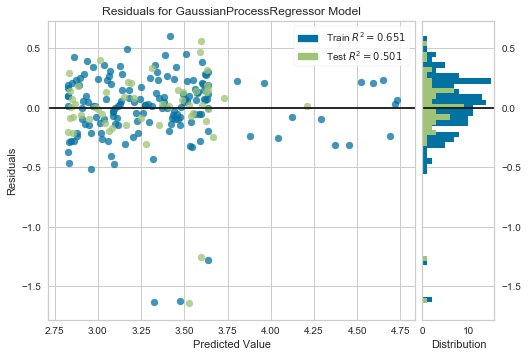

In [30]:
from yellowbrick.regressor import ResidualsPlot

rpv = ResidualsPlot(gp)
rpv.fit(X_train, y_train)
rpv.score(X_test, y_test)
rpv.show()
plt.show()

((array([-2.21906046, -1.85036834, -1.63307165, -1.47338453, -1.34433269,
         -1.23445265, -1.1377432 , -1.05064606, -0.97086677, -0.89683292,
         -0.82741562, -0.76177387, -0.69926181, -0.63937059, -0.58169027,
         -0.52588404, -0.47167018, -0.41880907, -0.3670937 , -0.31634247,
         -0.26639369, -0.2171012 , -0.16833095, -0.11995805, -0.0718644 ,
         -0.02393648,  0.02393648,  0.0718644 ,  0.11995805,  0.16833095,
          0.2171012 ,  0.26639369,  0.31634247,  0.3670937 ,  0.41880907,
          0.47167018,  0.52588404,  0.58169027,  0.63937059,  0.69926181,
          0.76177387,  0.82741562,  0.89683292,  0.97086677,  1.05064606,
          1.1377432 ,  1.23445265,  1.34433269,  1.47338453,  1.63307165,
          1.85036834,  2.21906046]),
  array([-0.5608156 , -0.46958344, -0.40141998, -0.33839634, -0.31950594,
         -0.29381943, -0.2189889 , -0.21187738, -0.19133886, -0.18721514,
         -0.1527635 , -0.15110366, -0.14548087, -0.13837522, -0.13552341,
 

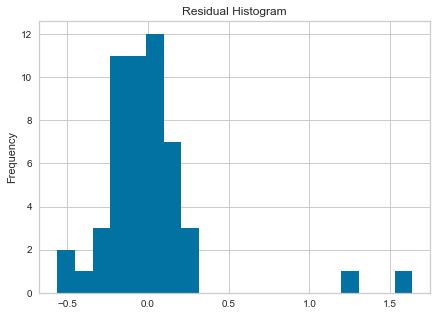

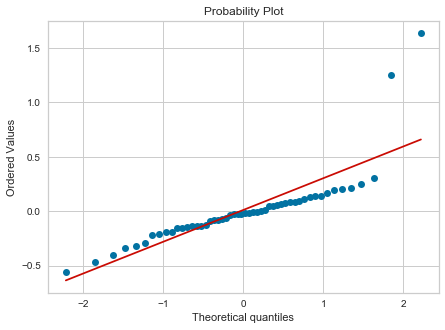

In [33]:
from scipy import stats

resids = y_test - y_pred
fig, ax = plt.subplots(figsize=(7, 5))
pd.Series(resids, name="residuals").plot.hist(
    bins=20, ax=ax, title="Residual Histogram")
# probability plot
fig, ax = plt.subplots(figsize=(7, 5))
stats.probplot(resids, plot=ax)

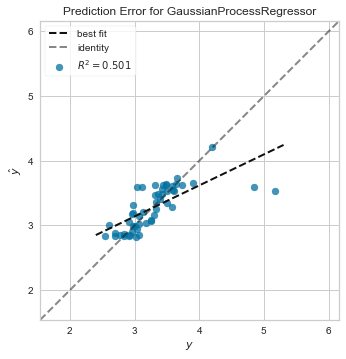

In [36]:
from yellowbrick.regressor import PredictionError

pev = PredictionError(gp)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.show()
plt.show()